In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def softmax_der(x):
    pass

def relu(x):
    return np.maximum(0, x)

def relu_der(x):
    return (x > 0).astype(x.dtype)

def mse_loss(y_hat, y):
    return np.square(y - y_hat).mean(axis=1)

def mse_loss_der(y_hat, y):
    return -2 * np.sum(y - y_hat, axis=1)

In [5]:
class Dense:
    def __init__(self, input_size, num_of_neurons):
        self.w = np.random.rand(input_size, num_of_neurons)
        self.b = np.random.rand(num_of_neurons)
    
    def forward(self, x):
        return np.dot(x, self.w) + self.b
    
    def backward(self, x, input_grad, lr):
        grad_w = np.dot(input_grad, x).T
        grad_b = input_grad.T[0]
        
        self.w -= lr * grad_w
        self.b -= lr * grad_b
        
#         return (grad_w, grad_b)

class Relu:
    def forward(self, x):
        return np.maximum(0, x)
    
    def backward(self, x):
        return (x > 0).astype(x.dtype)

class MSE:
    def forward(self, y, y_hat):
        return np.square(y - y_hat).mean(axis=1)
    
    def backward(self, y_hat, y):
        return -2 * np.sum(y - y_hat, axis=1)

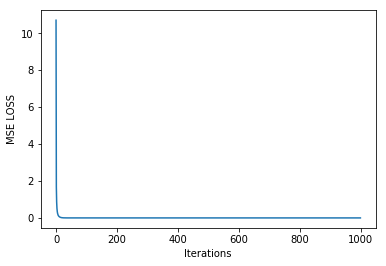

In [33]:
batch_size = 16
length = 5
num_of_neurons = 10
lr = 1e-3

x = np.zeros((batch_size, length))

l1 = Dense(length, num_of_neurons)
l2 = Dense(num_of_neurons, length)
activation = Relu()
loss_func = MSE()
losses = []

for i in range(1000):
    z1 = l1.forward(x)
    a1 = activation.forward(z1)

    z2 = l2.forward(a1)
    a2 = activation.forward(z2)

    loss = loss_func.forward(a2, x)

    # update last layer
    grad_loss = loss_func.backward(a2, x)
    grad_activation = activation.backward(z2)
    grad = grad_loss * grad_activation.T
    l2.backward(a1, grad, lr)
    
    # update hidden layers
    grad_activation = activation.backward(z1)
    grad = np.dot(grad.T, l1.w) * grad_activation
    l1.backward(x, grad.T, lr)
    losses.append(np.mean(loss))

plt.plot(losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Iterations')
plt.show()